In [1]:
import pandas as pd

import sys
sys.path.append('../')

from src.model import predict, train_model, get_statistic

## 0. Test train/test/load model

In [2]:
model, used_categories = train_model.train_model(
    machine_path='../data/machine_info.csv',
    maintenance_path='../data/maintain.csv',
)

<lifelines.CoxPHFitter: fitted with 80 total observations, 49 right-censored observations>
             duration col = 'Time Since Last Fix'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 80
number of events observed = 31
   partial log-likelihood = -118.25
         time fit was run = 2024-11-25 22:55:43 UTC

---
                          coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                 
Thời gian dừng máy (giờ) -0.16      0.86      0.13           -0.41            0.09                0.67                1.10
Số người thực hiện       -0.02      0.98      0.21           -0.42            0.38                0.66                1.47
Điện áp tiêu thụ (V)     -0.00      1.00      0.01           -0.01            0.01                0.99                1.01
Tuổi thọ thiết bị         0.00      1.00      0.00            0.00            0.00                1.00                1.00
Tên thiết bị_OP6          0.81      2.25      0.78           -0.72            2.34                0.49               10.36
Tên thiết bị_OP4          0.57      1.76      0.82           -1.05            2.18                0.35                8.82
Tên thiết bị_Máy rửa      0.29      1.34      0.68           -1.03            1.62                0.36                5.04
Line_B4                  -0.77      0.46      0.89           -2.51            0.98                0.08                2.66
Line_B2                   0.36      1.44      0.78           -1.16            1.89                0.31                6.60
Line_A3                  -0.26      0.77      0.71           -1.66            1.14                0.19                3.12
Line_B6                  -0.07      0.93      0.83           -1.69            1.54                0.18                4.68
Vùng thao tác_5.0        -0.31      0.73      0.80           -1.87            1.25                0.15                3.50
Vùng thao tác_20.0        0.55      1.73      0.74           -0.91            2.01                0.40                7.45
Vùng thao tác_2.0         0.28      1.33      0.59           -0.87            1.44                0.42                4.22
Mã xử lý_4.0             -1.03      0.36      0.97           -2.94            0.87                0.05                2.39
Mã xử lý_2.0             -0.51      0.60      0.61           -1.70            0.68                0.18                1.98
Mã Hiện tượng_99.0       -0.24      0.79      0.73           -1.68            1.20                0.19                3.33
Mã Hiện tượng_31.0        0.76      2.13      0.71           -0.64            2.15                0.53                8.63
Mã Nguyên nhân_99.0       0.57      1.76      0.76           -0.93            2.06                0.39                7.85

                          cmp to     z    p  -log2(p)
covariate                                            
Thời gian dừng máy (giờ)    0.00 -1.23 0.22      2.20
Số người thực hiện          0.00 -0.09 0.93      0.11
Điện áp tiêu thụ (V)        0.00 -0.60 0.55      0.87
Tuổi thọ thiết bị           0.00  2.08 0.04      4.74
Tên thiết bị_OP6            0.00  1.04 0.30      1.75
Tên thiết bị_OP4            0.00  0.69 0.49      1.02
Tên thiết bị_Máy rửa        0.00  0.43 0.67      0.58
Line_B4                     0.00 -0.86 0.39      1.36
Line_B2                     0.00  0.47 0.64      0.64
Line_A3                     0.00 -0.36 0.72      0.48
Line_B6                     0.00 -0.09 0.93      0.11
Vùng thao tác_5.0           0.00 -0.39 0.70      0.52
Vùng thao tác_20.0          0.00  0.74 0.46      1.12
Vùng thao tác_2.0           0.00  0.48 0.63      0.67
Mã xử lý_4.0                0.00 -1.06 0.29      1.80
Mã xử lý_2.0                0.00 -0.84 0.40      1.32
Mã Hiện tượng_99.0          0.00 -0.32 0.75      0.42
Mã Hiện tượng_31.0    

In [3]:
train_model.save_model(
    model=model,
    used_categories=used_categories,
    model_path='../saved_models/model.pkl',
    categories_path='../saved_models/categories.pkl',
)

Model saved to ../saved_models/model.pkl
Used categories saved to ../saved_models/categories.pkl


In [4]:
model, used_categories = train_model.load_model(
    model_path='../saved_models/model.pkl',
    categories_path='../saved_models/categories.pkl',
)

Model loaded from ../saved_models/model.pkl
Used categories loaded from ../saved_models/categories.pkl


<Axes: xlabel='log(HR) (95% CI)'>

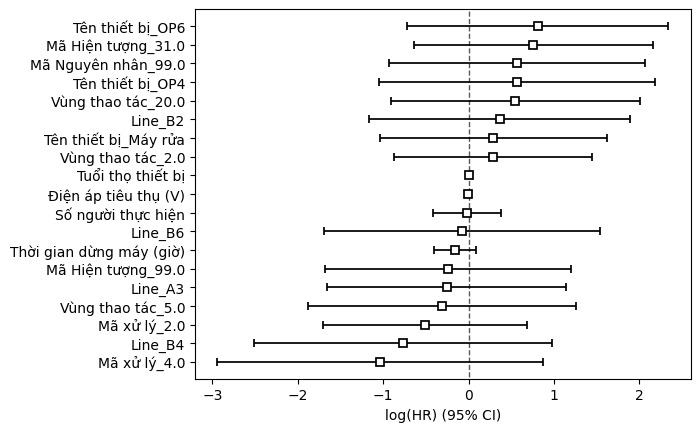

In [5]:
model.plot()

In [2]:
df1 = pd.read_csv('../data/machine_info.csv')
df2 = pd.read_csv('../data/maintain.csv')

## 1. Test repair method

In [7]:
res = predict.finding_repair_method(
    machine_name= "OP4",
    machine_id= None, 
    error_describe= "roi dao",
    maintain_df= df2,
)
print(res)

Lỗi thứ 3
Tên thiết bị: OP4
Số quản lý thiết bị: VMI 0082
Ngày phát sinh: 07-01-2024
Nắm bắt hiện tượng: #9913: rơi dao
Nguyên nhân 1: mòn , gỉ , linh kiện cơ cấu cụm ATC
Nguyên nhân 2: không có dầu bôi trơn , dầu bôi trơn bị lão hóa
Nguyên nhân gốc: mòn seal trục ATC
Xử lý:  --- 1: thay tay ATC --- 2: cải tạo cụm gear ATC
Nội dung phòng chống tái phát: lên kế hoạch kiểm tra độ rơ cụm ATC , dầu bôi trơn cụm Gear ATC

Lỗi thứ 1
Tên thiết bị: OP4
Số quản lý thiết bị: VMI 0082
Ngày phát sinh: 05-01-2024
Nắm bắt hiện tượng: #9883: Rơi dao T4
Nguyên nhân 1: lệch góc orien giữa ATC và trục chính
Nguyên nhân 2: nghi ngờ do mòn lacking trục vít Y ở vị trí đổi dao
Nguyên nhân gốc: nan
Xử lý:  --- 1: bù điều chỉnh góc orien --- 2: Kiểm tra tay atc --- 3: kiểm tra trục vít Y1, Y2
Nội dung phòng chống tái phát: nên kế hoạch thay thế trục vít Y1, Y2 , kiểm tra lại đồng tâm dao với trục chính , nhờ  PE kết hợp cùng điều chỉnh lại gốc gia công

Lỗi thứ 2
Tên thiết bị: OP4
Số quản lý thiết bị: VMI 008

d:\code\fpt_denso_hackathon\final_model\test\..\src\model\predict.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machine_data['sim_score'] = machine_data['Nắm bắt hiện tượng'].apply(lambda x: jaccard_similarity_2_shingle(x, error_describe))


## 2. Test recommend_maintenance()

In [8]:
predict.recommend_maintenance(
    machine_number="VIM 0159",
    model=model,
    threshold=0.5,
    df1=df1,
    df2=df2,
    used_categories=used_categories,
)

'{"machine_number": "VIM 0159", "threshold": 0.5, "recommended_time_date": "18-12-2024"}'

In [8]:
df1.head(10)

,Số quản lý thiết bị,Tên thiết bị,Line,Ngày sản xuất,Điện áp tiêu thụ (V)
0,VMI 0082,OP4,B4,08-01-2021,480
1,VMI 0061,OP6,B2,10-12-2021,480
2,VMI 0125,OP2,B6,01-12-2022,440
3,VSC 0031,Máy rửa,A3,08-06-2021,380
4,VMI 0038,OP1,A2,31-03-2022,440
5,VMI 0062,OP7,B2,24-08-2022,415
6,VMI 0105,OP4,B5,28-05-2022,480
7,VSC 0038,Máy rửa,A4,03-05-2021,380
8,VMI 0083,OP5,B4,23-05-2022,480
9,VMI 0127,OP4,B6,25-08-2022,480


## 4. Test time_to_failure()
(can xem lai)

In [9]:
predict.time_to_failure(
    machine_number="VIM 0159",
    model=model,
    df1=df1,
    df2=df2,
    used_categories=used_categories,
)

'{"machine_number": "VIM 0159", "expected_failure_date": "04-11-2024"}'

# x2

In [4]:
predict.predict_maintenance_and_failure(
    machine_number="VIM 0159",
    model=model,
    threshold=0.5,
    df1=df1,
    df2=df2,
    used_categories=used_categories,
)

'{"machine_number": "VIM 0159", "recommended_time_date": "18-12-2024", "expected_failure_date": "04-11-2024"}'

## 5. Test covariate_effects

In [10]:
predict.covariate_effects_on_machine(
    machine_number="VIM 0159",
    model=model,
    df1=df1,
    df2=df2,
    used_categories=used_categories,
)

'{"machine_number": "VIM 0159", "covariate_effects": {"Thời gian dừng máy (giờ)": {"value": 2.0, "description": "Covariate \'Thời gian dừng máy (giờ)\' with value \'2.0\' decreases failure risk by 14.49%."}, "Số người thực hiện": {"value": 1.0, "description": "Covariate \'Số người thực hiện\' with value \'1.0\' decreases failure risk by 1.88%."}, "Điện áp tiêu thụ (V)": {"value": 220.0, "description": "Covariate \'Điện áp tiêu thụ (V)\' with value \'220.0\' decreases failure risk by 0.32%."}, "Tuổi thọ thiết bị": {"value": 1251.0, "description": "Covariate \'Tuổi thọ thiết bị\' with value \'1251.0\' increases failure risk by 0.21%."}, "Vùng thao tác_20.0": {"value": 1.0, "description": "Covariate \'Vùng thao tác_20.0\' with value \'1.0\' increases failure risk by 73.12%."}, "Mã xử lý_2.0": {"value": 1.0, "description": "Covariate \'Mã xử lý_2.0\' with value \'1.0\' decreases failure risk by 39.97%."}}}'

# 6. Test statistic

In [3]:
import cv2
from IPython.display import Image

In [4]:
IMAGE_FOLDER_PATH = '../figures'

{'LK đồng bộ': {'BA18': 24, 'BE5': 7, 'BM6': 7, 'BE20': 6, 'BM14': 5, 'BE16': 5, 'BM12': 3, 'BM22': 2, 'BM27': 2, 'BM15': 2, 'BE3': 2, 'BM16': 1, 'BA2': 1, 'BA4': 1, 'BE9': 1, 'BE10': 1, 'BA16': 1, 'BE2': 1, 'BA7': 1, 'BA10': 1, 'BA12': 1, 'BE13': 1, 'BE23': 1, 'BM5': 1, 'BM7': 1, 'BE12': 1}, 'LK không thể tháo rời': {'AZ15': 24, 'MD1': 6, 'MM1': 5, 'MZ15': 2, 'EC2': 2, 'EF3': 2, 'EW5': 2, 'ES1': 2, 'ES2': 2, 'EW6': 2, 'MK13': 2, 'EF1': 2, 'EW1': 1, 'MO3': 1, 'EF4': 1, 'AQ5': 1, 'EM2': 1, 'MU2': 1, 'ES5': 1, 'EL2': 1, 'AD3': 1, 'MU3': 1, 'AB1': 1, 'AG4': 1, 'AM1': 1, 'MN2': 1, 'AK4': 1, 'MD2': 1, 'EP2': 1, 'EB6': 1, 'EZ15': 1, 'MC2': 1, 'MK14': 1, 'EF2': 1, 'EW2': 1, 'ME1': 1, 'MN4': 1, 'EO1': 1}}


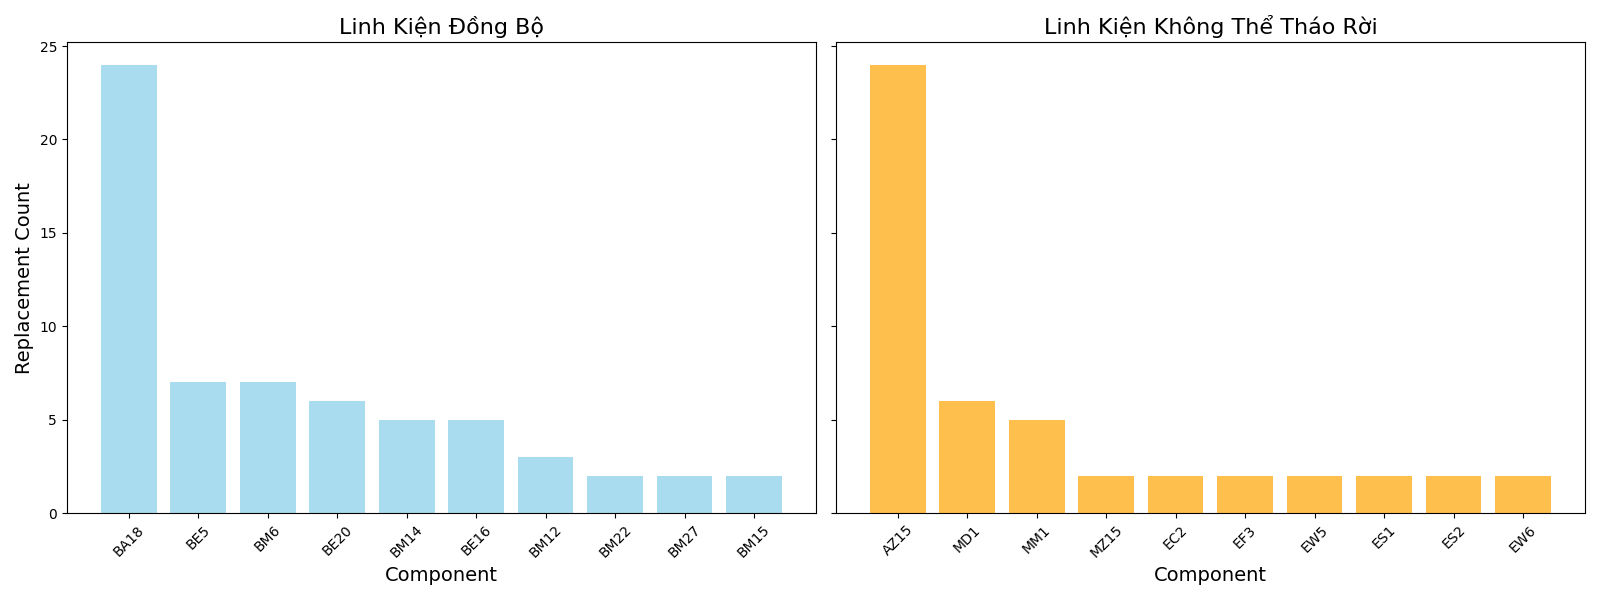

In [5]:
# Test component replacement frequency
component_frequency = get_statistic.frequent_component_replacement(df2, IMAGE_FOLDER_PATH)
print(component_frequency)
Image(filename='../figures/frequency_of_replaced_components.png')

{'failure_count': {0.0: 3, 1.0: 1, 2.0: 55, 3.0: 10, 4.0: 9, 6.0: 1, 7.0: 1}, 'avg_downtime': {0.0: 0.9400000000000001, 1.0: 2.33, 2.0: 2.0874545454545457, 3.0: 0.978, 4.0: 0.9188888888888889, 6.0: 1.0, 7.0: 0.75}}


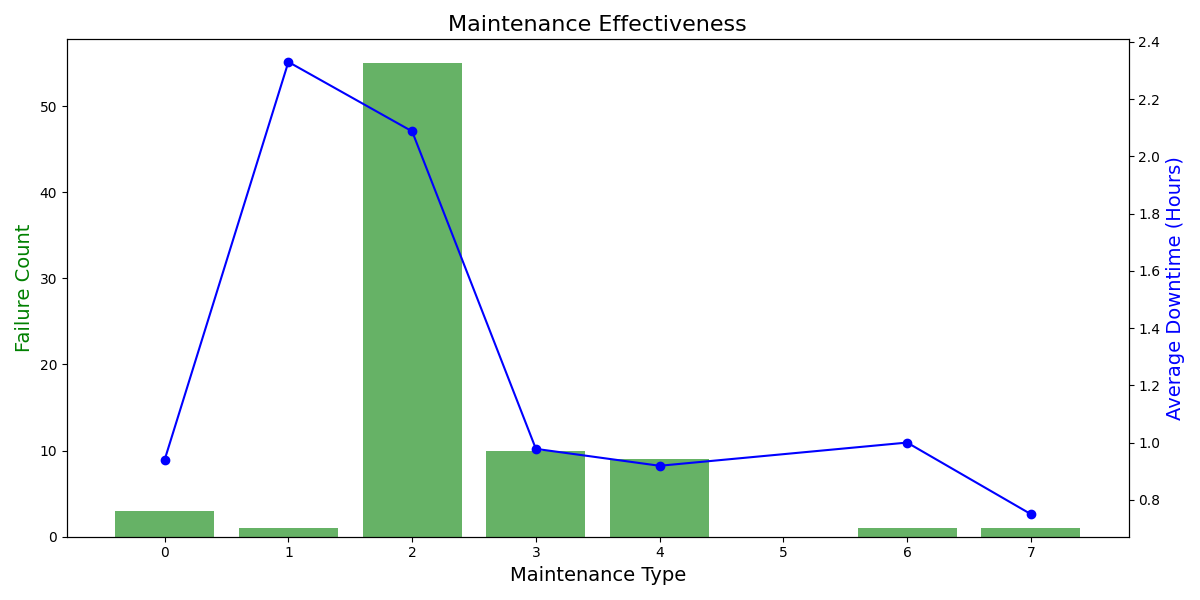

In [6]:
# Test component replacement frequency
component_frequency = get_statistic.maintenance_effectiveness(df2, IMAGE_FOLDER_PATH)
print(component_frequency)
Image(filename='../figures/maintenance_effectiveness.png')

{'frequency': {'Máy rửa': 16, 'OP6': 13, 'OP4': 12, 'OP2': 8, 'OP1': 7, 'OP5': 7, 'Máy kiểm tra bề mặt rỗ khí': 5, 'OP7': 4, 'OP3': 3, 'OP8': 3, 'OP9': 2}}


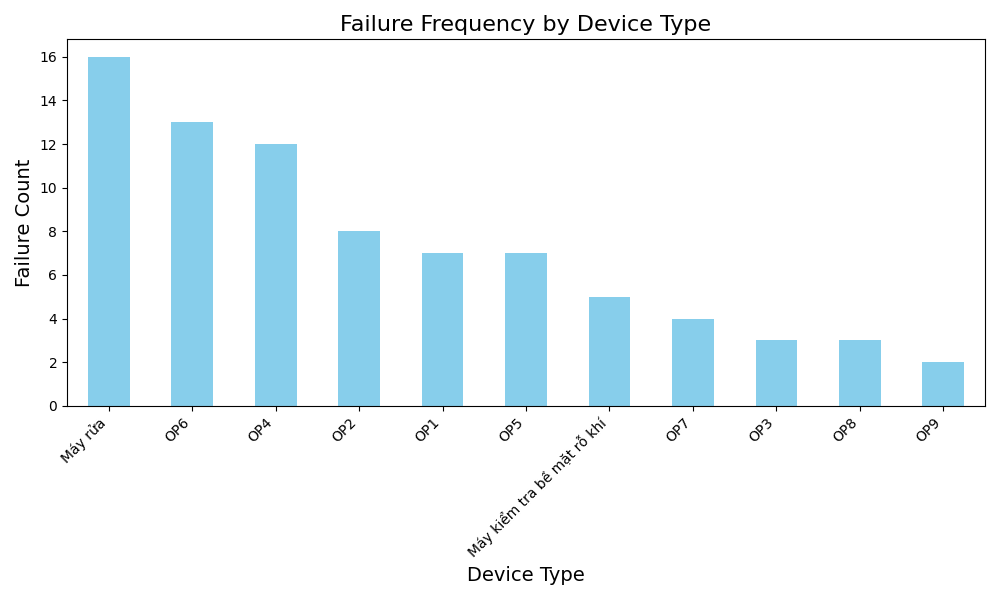

In [8]:
# Test component replacement frequency
component_frequency = get_statistic.failure_frequency_by_device_type(df2, IMAGE_FOLDER_PATH)
print(component_frequency)
Image(filename='../figures/failure_frequency_by_device_type.png')

{'cause_frequency': {99.0: 4, 21.0: 2, 31.0: 1, 36.0: 1, 30.0: 1, 94.0: 1, 93.0: 1, 46.0: 1}}


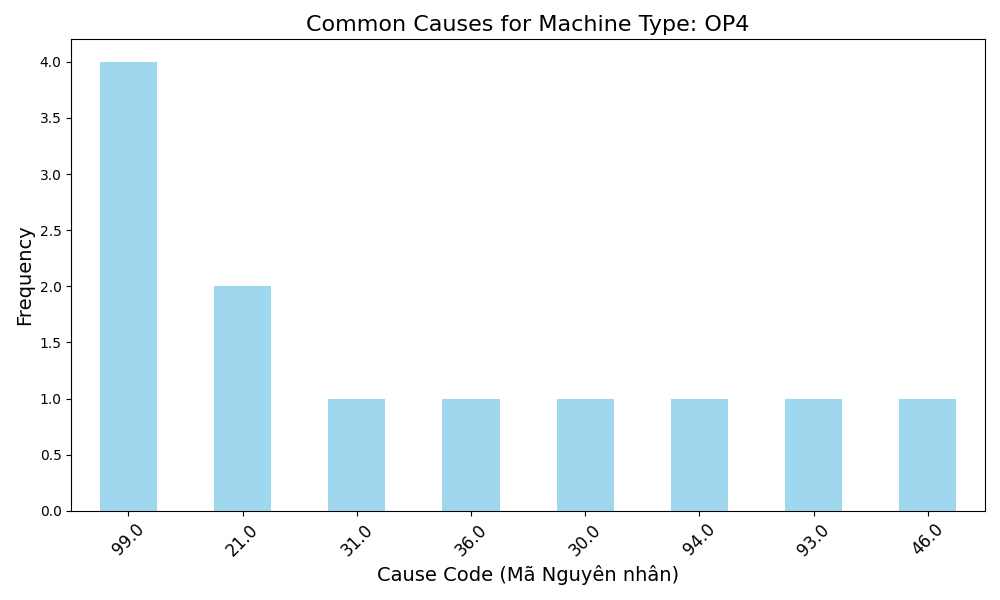

In [9]:
# Test component replacement frequency
component_frequency = get_statistic.common_causes_barchart_by_type(df2, "OP4", IMAGE_FOLDER_PATH)
print(component_frequency)
Image(filename='../figures/common_causes_OP4.png')